# Recommender Systems (RS):

- We can use deep learning to predict rating for users based on the items

- We use the Movielens-100k dataset for illustration. There are 943 users and 1682 movies. In total there are a 100k ratings in the dataset.

In [2]:
import pandas as pd
import numpy as np

u_cols = ['user_id', 'sex', 'age', 'occupation', 'zip_code']
users = pd.read_csv('./Movie_Lens/users.dat', sep='::', names=u_cols, encoding='latin-1')

/Users/miladtoutounchian/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """


In [15]:
print(users.head())

   user_id sex  age  occupation zip_code
0        1   F    1          10    48067
1        2   M   56          16    70072
2        3   M   25          15    55117
3        4   M   45           7    02460
4        5   M   25          20    55455


In [17]:
r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv('./Movie_Lens/ratings.dat', sep='::', names=r_cols, encoding='latin-1')

/Users/miladtoutounchian/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [18]:
print(ratings.head())

   user_id  movie_id  rating  unix_timestamp
0        1      1193       5       978300760
1        1       661       3       978302109
2        1       914       3       978301968
3        1      3408       4       978300275
4        1      2355       5       978824291


In [23]:
m_cols = ['movie_id', 'title', 'Genre']
movies = pd.read_csv('./Movie_Lens/movies.dat', sep='::', names=m_cols, usecols=range(5), encoding='latin-1')

/Users/miladtoutounchian/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [24]:
print(movies.head())

   movie_id                               title                         Genre
0         1                    Toy Story (1995)   Animation|Children's|Comedy
1         2                      Jumanji (1995)  Adventure|Children's|Fantasy
2         3             Grumpier Old Men (1995)                Comedy|Romance
3         4            Waiting to Exhale (1995)                  Comedy|Drama
4         5  Father of the Bride Part II (1995)                        Comedy


In [29]:
movie_ratings = pd.merge(movies, ratings)
lens = pd.merge(movie_ratings, users)

dataset = lens[['user_id', 'movie_id', 'rating']]

print(dataset.head())

   user_id  movie_id  rating
0        1         1       5
1        1        48       5
2        1       150       5
3        1       260       4
4        1       527       5


In [30]:
print(dataset.shape)

(1000209, 3)


In [34]:
print(dataset['user_id'].nunique())

6040


In [35]:
print(dataset['movie_id'].nunique())

3706


## Dataset

In [3]:
dataset = pd.read_csv("./ml-100k/u.data",sep='\t',names="user_id,item_id,rating,timestamp".split(","))

In [38]:
print(dataset.head())

   user_id  item_id  rating  timestamp
0      196      242       3  881250949
1      186      302       3  891717742
2       22      377       1  878887116
3      244       51       2  880606923
4      166      346       1  886397596


In [4]:
print(dataset['user_id'].nunique())

943


In [5]:
print(dataset['item_id'].nunique())

1682


In [6]:
import keras
from keras.models import Sequential
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
train, test = train_test_split(dataset, test_size=0.2)

n_users, n_movies = len(dataset.user_id.unique()), len(dataset.item_id.unique())
n_latent_factors = 3

movie_input = keras.layers.Input(shape=[1],name='Item')
movie_embedding = keras.layers.Embedding(n_movies + 1, n_latent_factors, name='Movie-Embedding')(movie_input)
movie_vec = keras.layers.Flatten(name='FlattenMovies')(movie_embedding)

user_input = keras.layers.Input(shape=[1],name='User')
user_vec = keras.layers.Flatten(name='FlattenUsers')(keras.layers.Embedding(n_users + 1, n_latent_factors,name='User-Embedding')(user_input))

prod = keras.layers.dot([movie_vec, user_vec], axes = -1, name='DotProduct', normalize=False)
model = keras.models.Model([user_input, movie_input], prod)
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

history = model.fit([train.user_id, train.item_id], train.rating, epochs=100, verbose=1)

y_hat = model.predict([test.user_id, test.item_id])
y_true = test.rating

/Users/miladtoutounchian/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Epoch 1/100
80000/80000 [==============================] - 2s 20us/step - loss: 12.1125 - acc: 0.0073
Epoch 2/100
80000/80000 [==============================] - 1s 19us/step - loss: 4.5957 - acc: 0.1435
Epoch 3/100
80000/80000 [==============================] - 1s 19us/step - loss: 1.9397 - acc: 0.2968
Epoch 4/100
80000/80000 [==============================] - 1s 19us/step - loss: 1.3165 - acc: 0.3580
Epoch 5/100
80000/80000 [==============================] - 2s 19us/step - loss: 1.0851 - acc: 0.3897
Epoch 6/100
80000/80000 [==============================] - 2s 19us/step - loss: 0.9851 - acc: 0.4043
Epoch 7/100
80000/80000 [==============================] - 2s 19us/step - loss: 0.9375 - acc: 0.4104
Epoch 8/100
80000/80000 [==============================] - 2s 20us/step - loss: 0.9117 - acc: 0.4145
Epoch 9/100
80000/80000 [==============================] - 2s 19us/step - loss: 0.8975 - acc: 0.4157
Epoch 10/100
80000/80000 [==============================] - 2s 19us/step - loss: 0.8878 - 

In [7]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_true, y_hat)

0.7311717652906896

In [8]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_true, y_hat)

0.8773522383374458

In [29]:
from sklearn.metrics import r2_score
r2_score(y_true, y_hat)

0.3033334205107707

20000


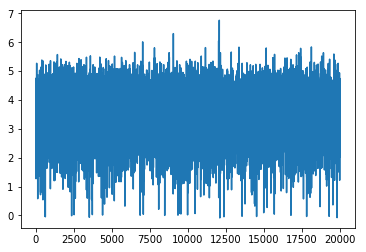

In [10]:
import matplotlib.pyplot as plt
print(len(y_hat))
plt.plot(range(len(y_hat)), y_hat)

In [19]:
print([(i, j) for (i, j) in zip(y_hat.ravel()[:20], y_true.ravel()[:20])])

[(4.1810427, 5), (3.7510118, 5), (3.3734493, 2), (3.791001, 3), (4.206919, 5), (3.2825694, 4), (1.7857158, 4), (4.0701256, 4), (4.1192484, 4), (3.445529, 3), (3.4736178, 4), (4.0720267, 5), (4.1486635, 5), (2.9359403, 2), (3.4940045, 4), (3.5713542, 5), (1.2732297, 2), (4.4180975, 5), (3.3769302, 3), (2.5889719, 2)]


In [27]:
train.user_id.values[0]

405

In [62]:
movie_embedding_learnt = model.get_layer(name='Movie-Embedding').get_weights()[0]
pd.DataFrame(movie_embedding_learnt).describe()

,0,1,2
count,1683.000000,1683.000000,1683.000000
mean,0.966648,-0.919319,0.863690
std,0.437029,0.595531,0.467666
min,-0.826557,-3.698236,-0.893432
25%,0.669403,-1.374091,0.543034
50%,0.986767,-0.938171,0.853226
75%,1.254426,-0.479760,1.189773
max,2.585588,0.943812,2.546664


In [63]:
user_embedding_learnt = model.get_layer(name='User-Embedding').get_weights()[0]
pd.DataFrame(user_embedding_learnt).describe()

,0,1,2
count,944.000000,944.000000,944.000000
mean,1.107262,-1.108085,1.168447
std,0.542848,0.566582,0.434296
min,-1.155398,-2.504371,-0.698575
25%,0.756104,-1.505675,0.913075
50%,1.093890,-1.167027,1.184544
75%,1.452147,-0.781497,1.469406
max,3.098990,1.435501,2.481169


## Next Item Prediction

- In online transactions or groceries transactions, people **do not** purchase 5 simiar items

- However, they buy the items that are related somehow into each other

- For example, a shoper wants to make Spaghetti at home, so he/she buy: Pasta -> Tomato Sauce -> Mushroom -> Parsley 

## MLP for next item prediction

In [1]:
# LSTM with Variable Length Input Sequences to One Character Output
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.utils import np_utils
from keras.preprocessing.sequence import pad_sequences
# fix random seed for reproducibility
numpy.random.seed(7)
# define the raw dataset
alphabet = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
# create mapping of characters to integers (0-25) and the reverse
char_to_int = dict((c, i) for i, c in enumerate(alphabet))
int_to_char = dict((i, c) for i, c in enumerate(alphabet))
# prepare the dataset of input to output pairs encoded as integers
num_inputs = 1000
max_len = 5
dataX = []
dataY = []
for i in range(num_inputs):
    start = numpy.random.randint(len(alphabet)-2)
    end = numpy.random.randint(start, min(start+max_len,len(alphabet)-1))
    sequence_in = alphabet[start:end+1]
    sequence_out = alphabet[end + 1]
    dataX.append([char_to_int[char] for char in sequence_in])
    dataY.append(char_to_int[sequence_out])
    print(sequence_in, '->', sequence_out)
# convert list of lists to array and pad sequences if needed
X = pad_sequences(dataX, maxlen=max_len, dtype='float32')
# reshape X to be [samples, time steps, features]
# X = numpy.reshape(X, (X.shape[0], max_len, 1))
# normalize
X = X / float(len(alphabet))
print(X)
# one hot encode the output variable
y = np_utils.to_categorical(dataY)
print(X.shape)
print(y.shape[1])
# print(y)
# create and fit the model
batch_size = 10
model = Sequential()
model.add(Dense(32, input_shape=(max_len, )))
model.add(Dense(y.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=500, batch_size=batch_size, verbose=1)
# summarize performance of the model
scores = model.evaluate(X, y, verbose=0)
print("Model Accuracy: %.2f%%" % (scores[1]*100))
# demonstrate some model predictions
for i in range(20):
    pattern_index = numpy.random.randint(len(dataX))
    pattern = dataX[pattern_index]
    x = pad_sequences([pattern], maxlen=max_len, dtype='float32')
    # x = numpy.reshape(x, (1, max_len, 1))
    x = x / float(len(alphabet))
    prediction = model.predict(x, verbose=0)
    index = numpy.argmax(prediction)
    result = int_to_char[index]
    seq_in = [int_to_char[value] for value in pattern]
    print(seq_in, "->", result)

0
1000/1000 [==============================] - 0s 432us/step - loss: 0.9325 - acc: 0.7860
Epoch 310/500
1000/1000 [==============================] - 0s 401us/step - loss: 0.9380 - acc: 0.7560
Epoch 311/500
1000/1000 [==============================] - 0s 438us/step - loss: 0.9314 - acc: 0.7790
Epoch 312/500
1000/1000 [==============================] - 0s 422us/step - loss: 0.9278 - acc: 0.7760
Epoch 313/500
1000/1000 [==============================] - 0s 422us/step - loss: 0.9282 - acc: 0.7810
Epoch 314/500
1000/1000 [==============================] - 0s 412us/step - loss: 0.9272 - acc: 0.7790
Epoch 315/500
1000/1000 [==============================] - 0s 436us/step - loss: 0.9219 - acc: 0.7850
Epoch 316/500
1000/1000 [==============================] - 0s 401us/step - loss: 0.9231 - acc: 0.7810
Epoch 317/500
1000/1000 [==============================] - 0s 403us/step - loss: 0.9205 - acc: 0.7880
Epoch 318/500
1000/1000 [==============================] - 0s 423us/step - loss: 0.9175 - acc:

#### MLP accuracy is 88.40%

## LSTM for next item prediction

In [1]:
# LSTM with Variable Length Input Sequences to One Character Output
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.utils import np_utils
from keras.preprocessing.sequence import pad_sequences
# fix random seed for reproducibility
numpy.random.seed(7)
# define the raw dataset
alphabet = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
# create mapping of characters to integers (0-25) and the reverse
char_to_int = dict((c, i) for i, c in enumerate(alphabet))
int_to_char = dict((i, c) for i, c in enumerate(alphabet))
# prepare the dataset of input to output pairs encoded as integers
num_inputs = 1000
max_len = 5
dataX = []
dataY = []
for i in range(num_inputs):
    start = numpy.random.randint(len(alphabet)-2)
    end = numpy.random.randint(start, min(start+max_len,len(alphabet)-1))
    sequence_in = alphabet[start:end+1]
    sequence_out = alphabet[end + 1]
    dataX.append([char_to_int[char] for char in sequence_in])
    dataY.append(char_to_int[sequence_out])
    print(sequence_in, '->', sequence_out)
# convert list of lists to array and pad sequences if needed
X = pad_sequences(dataX, maxlen=max_len, dtype='float32')
# reshape X to be [samples, time steps, features]
X = numpy.reshape(X, (X.shape[0], max_len, 1))
# normalize
X = X / float(len(alphabet))
# one hot encode the output variable
y = np_utils.to_categorical(dataY)
print(X.shape)
print(y.shape[1])
# print(y)
# create and fit the model
batch_size = 10
model = Sequential()
model.add(LSTM(32, input_shape=(X.shape[1], 1)))
model.add(Dense(y.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=500, batch_size=batch_size, verbose=1)
# summarize performance of the model
scores = model.evaluate(X, y, verbose=0)
print("Model Accuracy: %.2f%%" % (scores[1]*100))
# demonstrate some model predictions
for i in range(20):
    pattern_index = numpy.random.randint(len(dataX))
    pattern = dataX[pattern_index]
    x = pad_sequences([pattern], maxlen=max_len, dtype='float32')
    x = numpy.reshape(x, (1, max_len, 1))
    x = x / float(len(alphabet))
    prediction = model.predict(x, verbose=0)
    index = numpy.argmax(prediction)
    result = int_to_char[index]
    seq_in = [int_to_char[value] for value in pattern]
    print(seq_in, "->", result)

Using TensorFlow backend.
PQRST -> U
W -> X
O -> P
OPQ -> R
IJKLM -> N
QRSTU -> V
ABCD -> E
X -> Y
GHIJ -> K
M -> N
XY -> Z
QRST -> U
ABC -> D
JKLMN -> O
OP -> Q
XY -> Z
D -> E
T -> U
B -> C
QRSTU -> V
HIJ -> K
JKLM -> N
ABCDE -> F
X -> Y
V -> W
DE -> F
DEFG -> H
BCDE -> F
EFGH -> I
BCDE -> F
FG -> H
RST -> U
TUV -> W
STUV -> W
LMN -> O
P -> Q
MNOP -> Q
JK -> L
MNOP -> Q
OPQRS -> T
UVWXY -> Z
PQRS -> T
D -> E
EFGH -> I
IJK -> L
WX -> Y
STUV -> W
MNOPQ -> R
P -> Q
WXY -> Z
VWX -> Y
V -> W
HI -> J
KLMNO -> P
UV -> W
JKL -> M
ABCDE -> F
WXY -> Z
M -> N
CDEF -> G
KLMNO -> P
RST -> U
RS -> T
W -> X
J -> K
WX -> Y
JKLMN -> O
MN -> O
L -> M
BCDE -> F
TU -> V
MNOPQ -> R
NOPQR -> S
HIJ -> K
JKLM -> N
STUVW -> X
QRST -> U
N -> O
VWXY -> Z
B -> C
UVWX -> Y
OP -> Q
K -> L
C -> D
X -> Y
ST -> U
JKLM -> N
B -> C
QR -> S
RS -> T
VWXY -> Z
S -> T
NOP -> Q
KLMNO -> P
IJ -> K
EF -> G
MNOP -> Q
WXY -> Z
HI -> J
P -> Q
STUVW -> X
Q -> R
MN -> O
O -> P
C -> D
L -> M
JKLM -> N
K -> L
IJKLM -> N
FGHIJ -> K
L

#### LSTM accuracy is 95.10%

## Deep Learning for Temporal Recommendation

- A novel deep neural network based architecture that models the combination of long-term static and short-term temporal user preferences to improve the recommendation performance

- https://github.com/sonyisme/keras-recommendation

## Deep Learning for Content-based Recommendation based on images

- https://nycdatascience.com/blog/student-works/deep-learning-meets-recommendation-systems/